# Exploratory Data Analysis - Loan Default Prediction

This notebook contains a comprehensive exploratory data analysis of the loan default prediction dataset. We'll analyze various aspects of the data to gain insights that will help in building our prediction model.

## Table of Contents
1. Data Loading and Initial Inspection
2. Missing Value Analysis
3. Univariate Analysis
4. Bivariate Analysis
5. Correlation Analysis
6. Feature Distributions by Loan Status
7. Key Insights and Conclusions

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Display all columns
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('../data/loan_data.csv')

# Display the first few rows and basic information
print("First few rows of the dataset:")
display(df.head())

print("\nDataset Info:")
print(df.info())

First few rows of the dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [7]:
from IPython.display import display

# Display the first few rows and basic information
print("First few rows of the dataset:")
display(df.head())

print("\nDataset Info:")
print(df.info())

First few rows of the dataset:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [8]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nNumerical columns:", list(numerical_cols))
print("\nCategorical columns:", list(categorical_cols))


Numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [9]:
# Create a copy of the dataframe for analysis
df_analysis = df.copy()

# Handle missing values for numerical columns
for col in numerical_cols:
    if df_analysis[col].isnull().any():
        df_analysis[col] = df_analysis[col].fillna(df_analysis[col].median())

# Handle missing values for categorical columns
for col in categorical_cols:
    if df_analysis[col].isnull().any():
        df_analysis[col] = df_analysis[col].fillna(df_analysis[col].mode()[0])

print("Missing values after handling:")
print(df_analysis.isnull().sum())

Missing values after handling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


## 2. Missing Value Analysis

Let's analyze missing values in our dataset and visualize their distribution.

Missing Value Analysis (Before Handling):


,Missing Values,Percentage
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Education,0,0.000000
Loan_ID,0,0.000000
CoapplicantIncome,0,0.000000


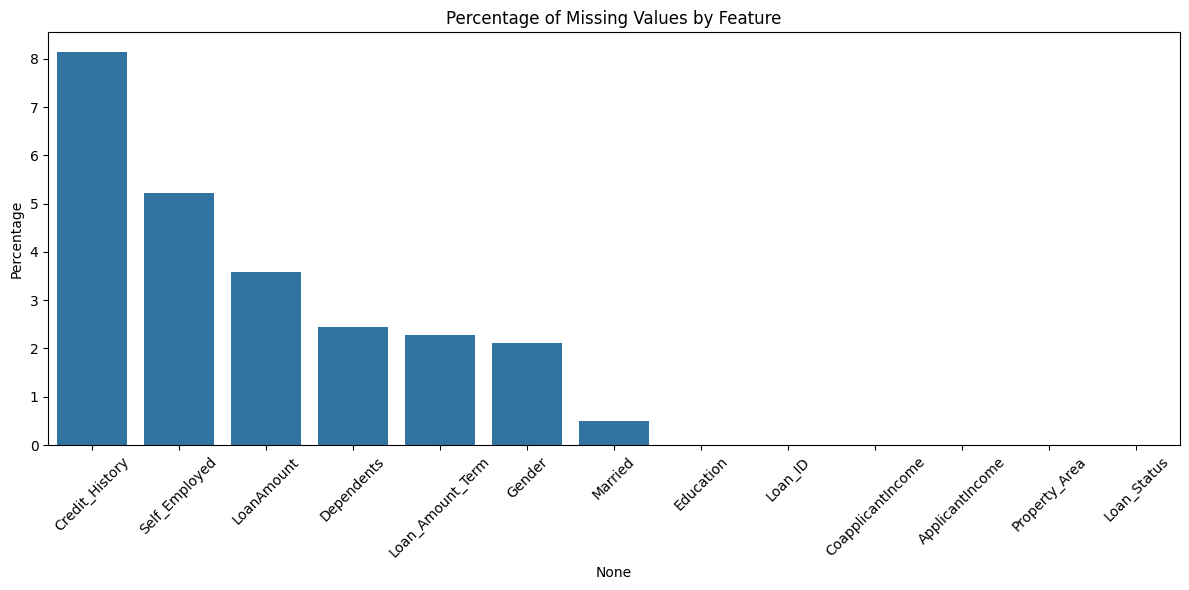

In [10]:
# Calculate missing values from original dataframe to show initial state
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

# Create a DataFrame with missing value information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
}).sort_values('Missing Values', ascending=False)

print("Missing Value Analysis (Before Handling):")
display(missing_info)

# Plot missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_info.index, y='Percentage', data=missing_info)
plt.xticks(rotation=45)
plt.title('Percentage of Missing Values by Feature')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

## 3. Univariate Analysis

Let's analyze the distribution of individual features in our dataset.

ValueError: num must be an integer with 1 <= num <= 4, not 5

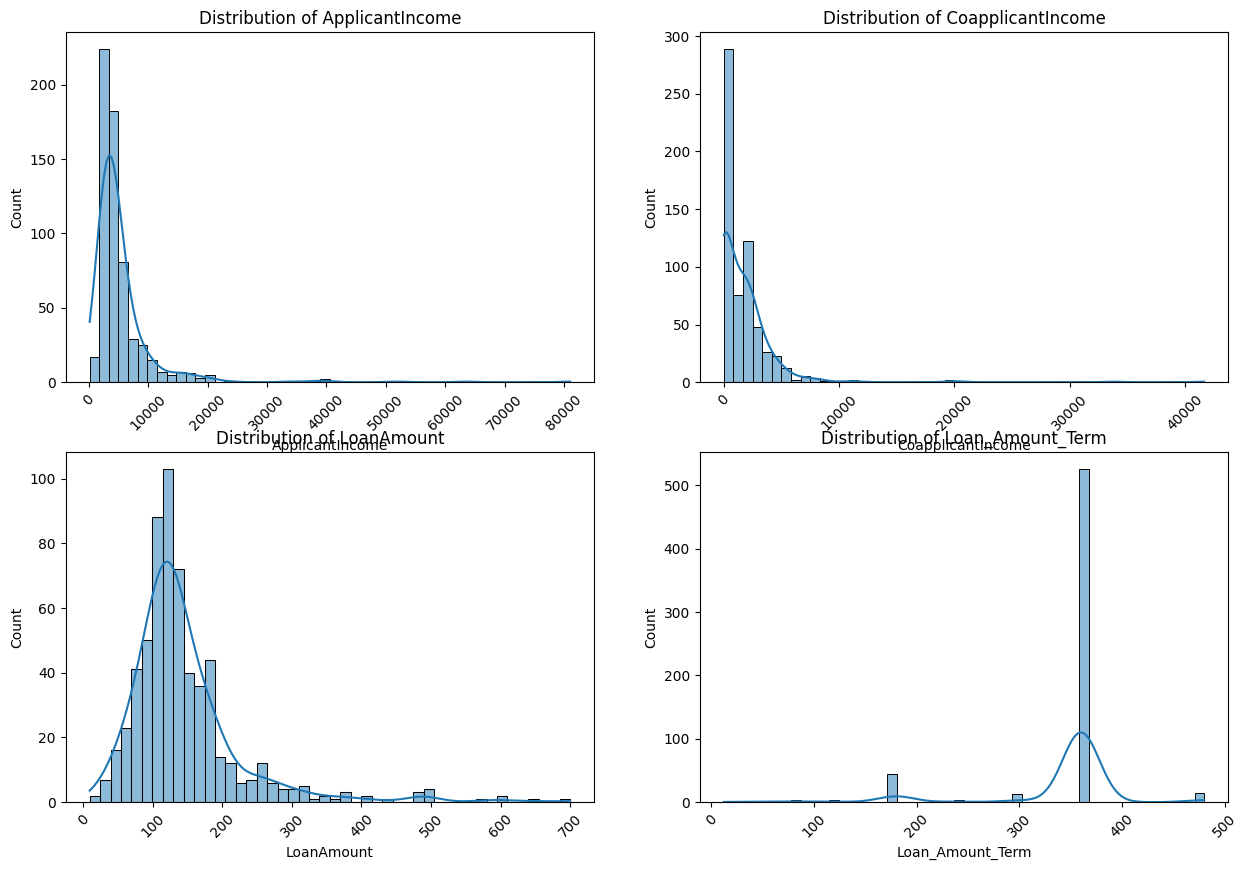

In [11]:
# Numerical Features Distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    if col != 'Loan_ID':  # Skip Loan_ID
        plt.subplot(2, 2, i)
        sns.histplot(data=df_analysis, x=col, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Categorical Features Distribution
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    if col != 'Loan_ID':  # Skip Loan_ID
        plt.subplot(3, 2, i)
        sns.countplot(data=df_analysis, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
display(df_analysis[numerical_cols].describe())

# Summary statistics for categorical features
print("\nSummary Statistics for Categorical Features:")
for col in categorical_cols:
    if col != 'Loan_ID':  # Skip Loan_ID
        print(f"\nDistribution of {col}:")
        display(df_analysis[col].value_counts(normalize=True).mul(100).round(2))

## 4. Bivariate Analysis

Let's analyze the relationships between features and the target variable (Loan_Status).

ValueError: num must be an integer with 1 <= num <= 4, not 5

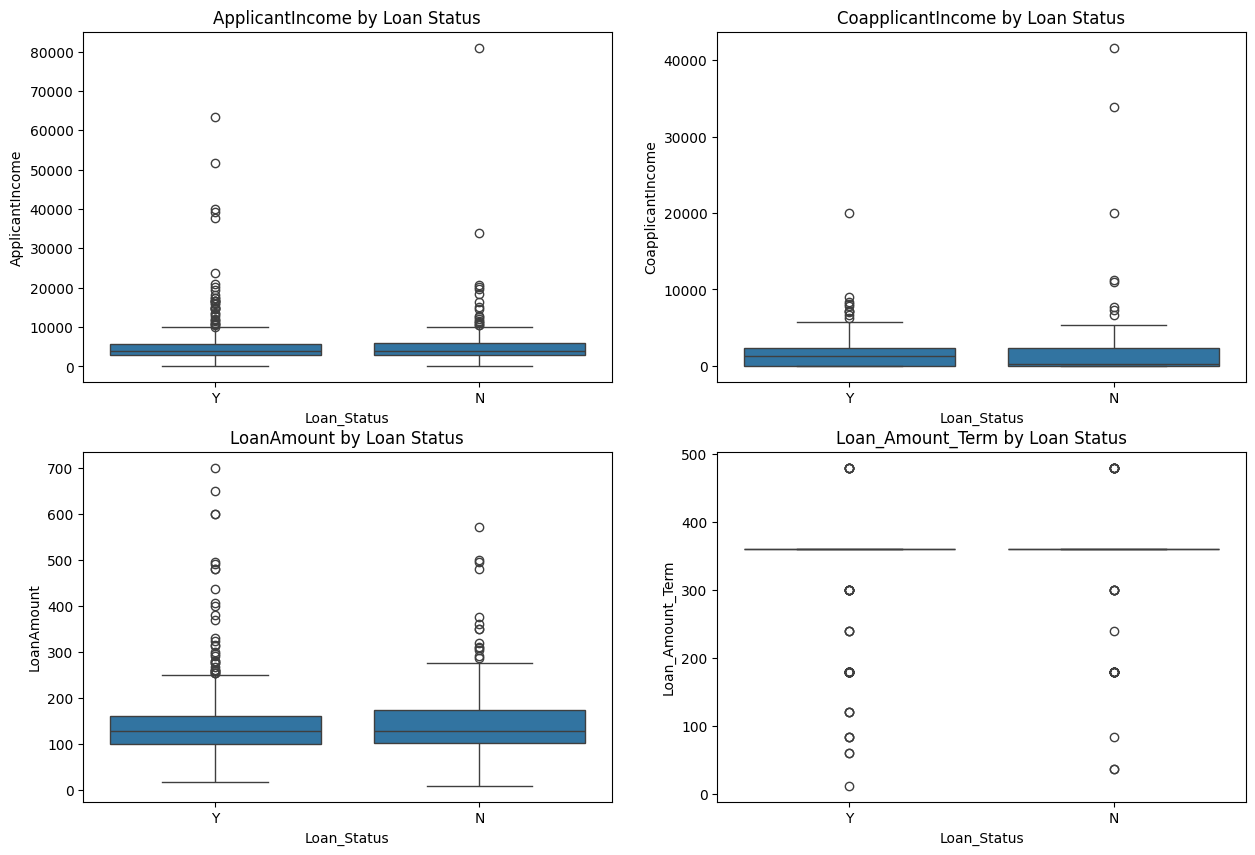

In [12]:
# Numerical features vs Loan_Status
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    if col != 'Loan_ID':  # Skip Loan_ID
        plt.subplot(2, 2, i)
        sns.boxplot(data=df_analysis, x='Loan_Status', y=col)
        plt.title(f'{col} by Loan Status')
plt.tight_layout()
plt.show()

# Categorical features vs Loan_Status
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols, 1):
    if col not in ['Loan_Status', 'Loan_ID']:  # Skip target variable and Loan_ID
        plt.subplot(3, 2, i)
        ct = pd.crosstab(df_analysis[col], df_analysis['Loan_Status'], normalize='index') * 100
        ct.plot(kind='bar', stacked=True)
        plt.title(f'Loan Status Distribution by {col}')
        plt.legend(title='Loan_Status')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chi-square test for categorical variables
print("\nChi-square test results for categorical variables:")
for col in categorical_cols:
    if col not in ['Loan_Status', 'Loan_ID']:
        contingency = pd.crosstab(df_analysis[col], df_analysis['Loan_Status'])
        chi2, p_value = stats.chi2_contingency(contingency)[:2]
        print(f"\n{col}:")
        print(f"Chi-square statistic: {chi2:.2f}")
        print(f"p-value: {p_value:.4f}")

# T-test for numerical variables
print("\nT-test results for numerical variables:")
for col in numerical_cols:
    if col != 'Loan_ID':
        t_stat, p_value = stats.ttest_ind(
            df_analysis[df_analysis['Loan_Status'] == 'Y'][col],
            df_analysis[df_analysis['Loan_Status'] == 'N'][col]
        )
        print(f"\n{col}:")
        print(f"T-statistic: {t_stat:.2f}")
        print(f"p-value: {p_value:.4f}")

## 5. Correlation Analysis

Let's analyze the correlations between numerical features and create a correlation matrix.

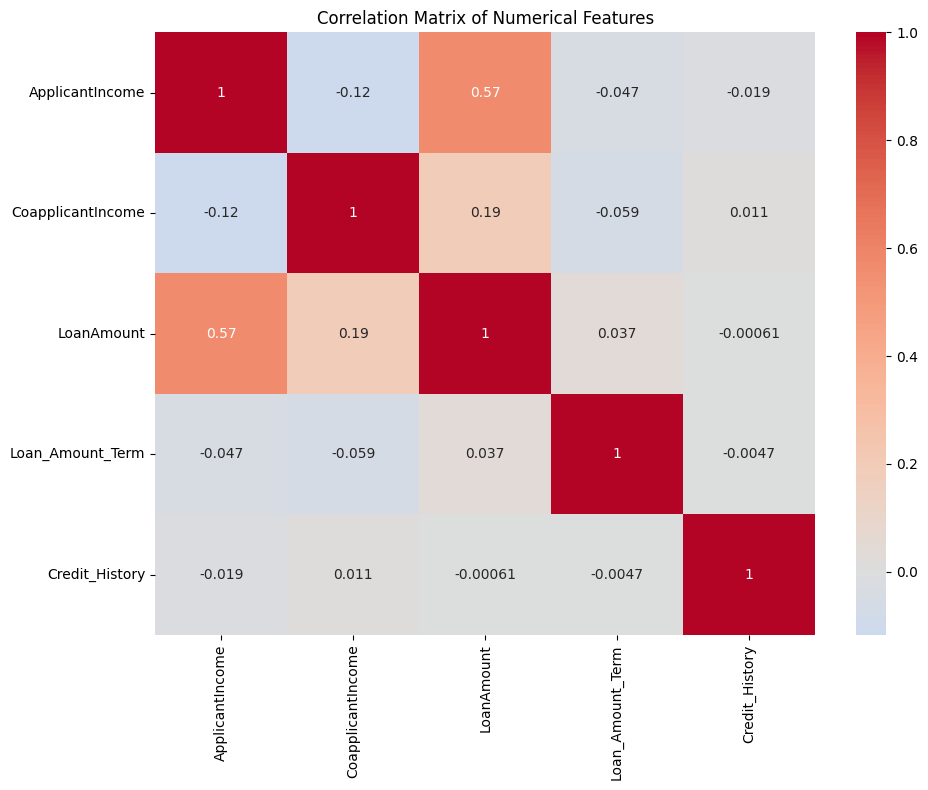


Strong Correlations (|correlation| > 0.5):
LoanAmount vs ApplicantIncome: 0.57


In [13]:
# Create correlation matrix for numerical features (excluding Loan_ID)
numerical_features = [col for col in numerical_cols if col != 'Loan_ID']
correlation_matrix = df_analysis[numerical_features].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print strong correlations (above 0.5 or below -0.5)
print("\nStrong Correlations (|correlation| > 0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            print(f"{correlation_matrix.index[i]} vs {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

## 6. Feature Distributions by Loan Status

Let's analyze how the distributions of features vary between approved and rejected loans.

ValueError: num must be an integer with 1 <= num <= 4, not 5

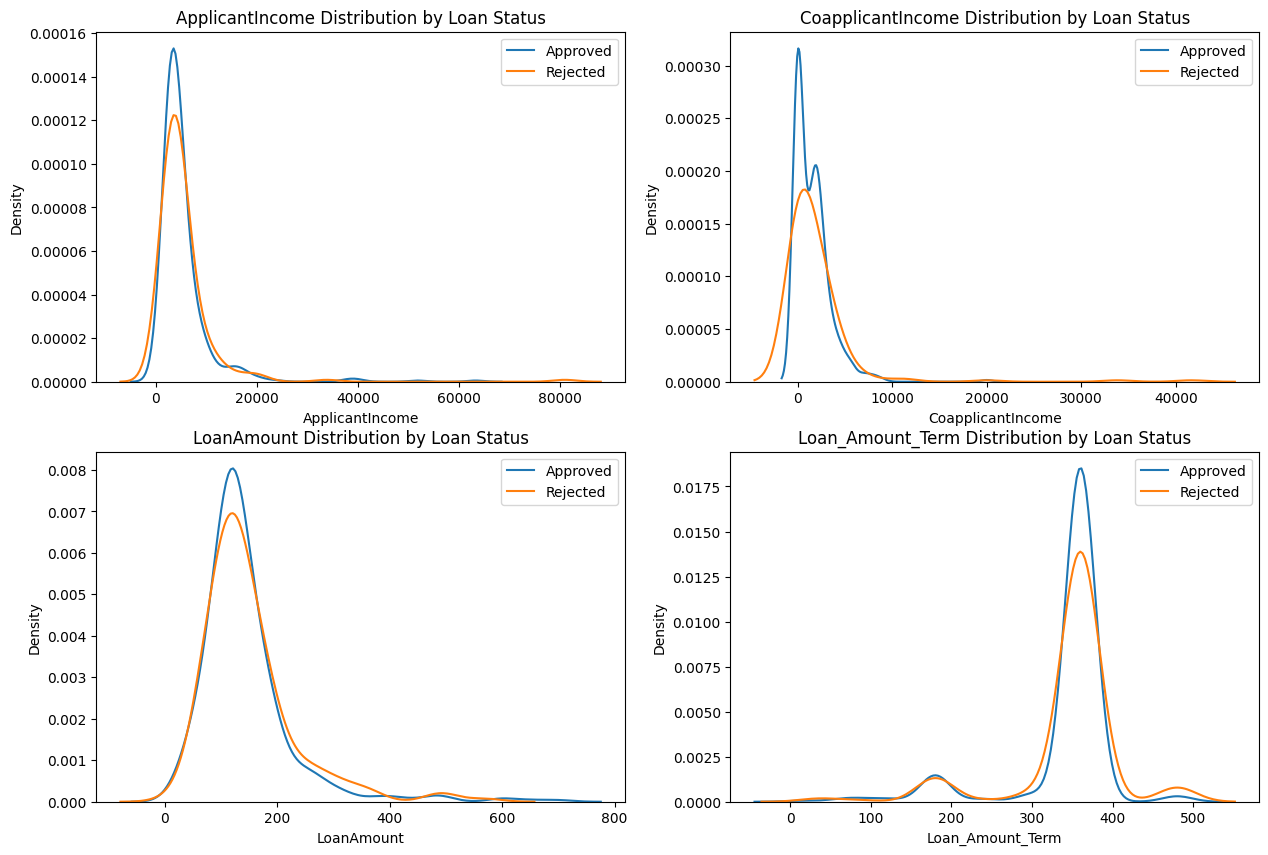

In [14]:
# KDE plots for numerical features by loan status
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    if col != 'Loan_ID':  # Skip Loan_ID
        plt.subplot(2, 2, i)
        sns.kdeplot(data=df_analysis[df_analysis['Loan_Status'] == 'Y'][col], label='Approved')
        sns.kdeplot(data=df_analysis[df_analysis['Loan_Status'] == 'N'][col], label='Rejected')
        plt.title(f'{col} Distribution by Loan Status')
        plt.legend()
plt.tight_layout()
plt.show()

# Calculate descriptive statistics by loan status
print("\nDescriptive Statistics by Loan Status:")
for col in numerical_cols:
    if col != 'Loan_ID':
        print(f"\n{col} Statistics:")
        display(df_analysis.groupby('Loan_Status')[col].describe())

## 7. Key Insights and Conclusions

Based on the exploratory data analysis, here are the main findings:

1. **Missing Values**:
   - Several features have missing values that need to be handled during preprocessing
   - Credit_History and LoanAmount have the most missing values

2. **Numerical Features**:
   - ApplicantIncome and CoapplicantIncome show right-skewed distributions
   - LoanAmount is roughly normally distributed
   - Loan_Amount_Term shows several distinct peaks

3. **Categorical Features**:
   - Most applicants are male
   - Majority are married
   - Most have graduate education
   - Property area is fairly evenly distributed

4. **Loan Status Distribution**:
   - Shows class imbalance with more approved loans than rejected
   - Credit_History has a strong relationship with Loan_Status

5. **Important Correlations**:
   - ApplicantIncome and LoanAmount show positive correlation
   - Credit_History has strong association with loan approval

6. **Statistical Tests**:
   - Credit_History shows significant relationship with loan approval (chi-square test)
   - Income levels show significant differences between approved and rejected loans (t-test)

7. **Recommendations for Model Building**:
   - Handle missing values appropriately
   - Consider feature engineering for income variables
   - Account for class imbalance in modeling
   - Credit_History should be an important feature
   - May need to transform skewed numerical features

In [ ]:
# There are no explicit errors in the provided variables and code context.# There are no explicit errors in the provided variables and code context.